In [98]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
import cv2
from scipy import ndimage as nd

In [99]:
#Load the image to be segmented. It should a be 2D image
image = io.imread("/content/drive/MyDrive/image_for_segm.jpeg")

In [75]:
image.shape

(2737, 4738)

In [101]:
#Remove noise from the image
denoise_image =  cv2.fastNlMeansDenoising(image,None,10,7,21)

In [88]:
denoise_image_as_8byte = img_as_ubyte(denoise_image)

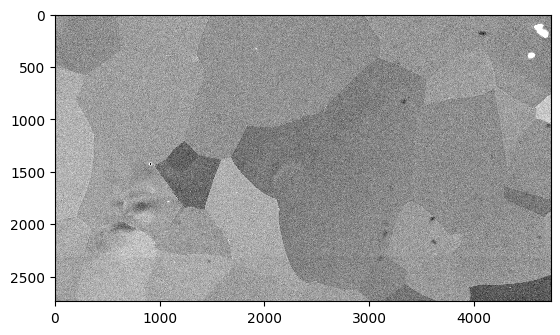

In [102]:
#Let's plot the original image
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')

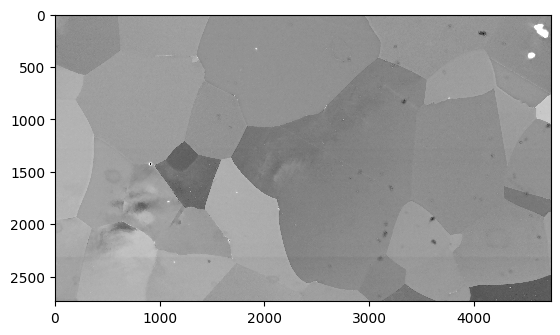

In [105]:
#Let's plot the denoised image
plt.imshow(denoise_image_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

(array([1.630000e+02, 3.200000e+01, 1.200000e+01, 4.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        0.000000e+00, 7.000000e+00, 5.000000e+00, 7.000000e+00,
        9.000000e+00, 1.100000e+01, 1.600000e+01, 1.500000e+01,
        3.300000e+01, 2.100000e+01, 3.400000e+01, 2.500000e+01,
        4.600000e+01, 5.500000e+01, 4.800000e+01, 8.200000e+01,
        7.900000e+01, 1.430000e+02, 1.350000e+02, 2.210000e+02,
        2.230000e+02, 3.590000e+02, 6.000000e+02, 6.510000e+02,
        2.812000e+03, 6.900000e+03, 3.214900e+04, 4.092300e+04,
        4.818100e+04, 2.107100e+04, 3.555800e+04, 2.110500e+04,
        3.605800e+04, 4.212700e+04, 2.752100e+04, 4.897400e+04,
        4.461900e+04, 1.087040e+05, 1.100240e+05, 2.029960e+05,
        1.465730e+05, 2.967040e+05, 4.262040e+05, 3.206680e+05,
        5.372960e+05, 3.741060e+05, 8.196720e+05, 7.345110e+05,
        1.279109e+06, 9.646000e+05, 8.877400e+05, 3.798370e+05,
        6.547390e+05, 1.296502e+06, 6.28

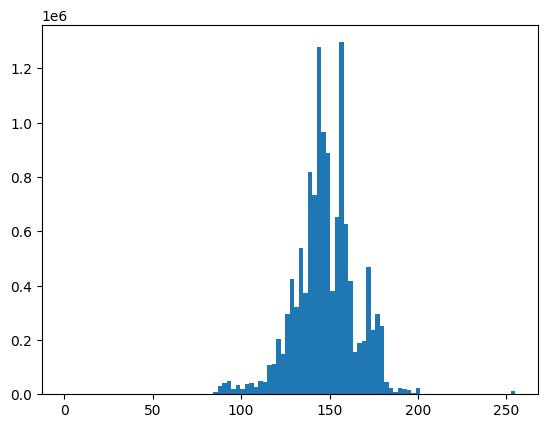

In [106]:
#Plot the histogram to see the number or peaks contained in the image. This will help in picking the regions for the histogram segmentation.

plt.hist(denoise_image_as_8byte.flat, bins=100, range=(0,255))      #.flat returns the flattened numpy array (1D)

In [107]:
segment_1 = (denoise_image_as_8byte <= 80)
segment_2 = (denoise_image_as_8byte > 80) & (denoise_image_as_8byte <= 150)
segment_3 = (denoise_image_as_8byte > 150) & (denoise_image_as_8byte <= 210)
segment_4 = (denoise_image_as_8byte > 210)

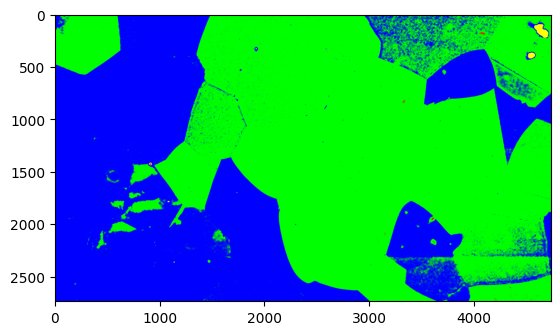

In [108]:
#How to show all these images in single visualization? How to visualize the created images in a single window.
#Create a new empty image with same shape as original except with 3 layers.
#print(median_img.shape[0])
all_segments = np.zeros((denoise_image_as_8byte.shape[0], denoise_image_as_8byte.shape[1], 3)) #nothing but denoise image size but blank

all_segments[segment_1] = (1,0,0)
all_segments[segment_2] = (0,1,0)
all_segments[segment_3] = (0,0,1)
all_segments[segment_4] = (1,1,0)
plt.imshow(all_segments)

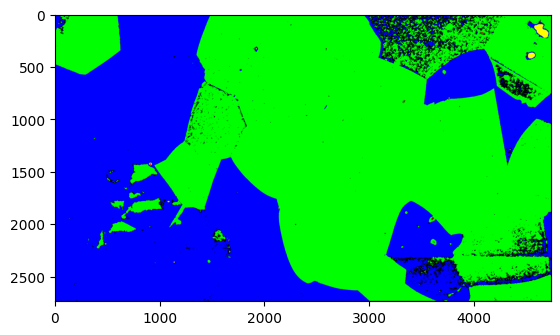

In [109]:
#Cleaning the image
#You can employ binary opening and closing operations. Open operation deals with isolated pixels within the window
#Closing deals with isolated holes within the defined window


segment_1_opened = nd.binary_opening(segment_1, np.ones((3,3)))
segment_1_closed = nd.binary_closing(segment_1_opened, np.ones((3,3)))

segment_2_opened = nd.binary_opening(segment_2, np.ones((3,3)))
segment_2_closed = nd.binary_closing(segment_2_opened, np.ones((3,3)))

segment_3_opened = nd.binary_opening(segment_3, np.ones((3,3)))
segment_3_closed = nd.binary_closing(segment_3_opened, np.ones((3,3)))

segment_4_opened = nd.binary_opening(segment_4, np.ones((3,3)))
segment_4_closed = nd.binary_closing(segment_4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_image_as_8byte.shape[0], denoise_image_as_8byte.shape[1], 3))

all_segments_cleaned[segment_1_closed] = (1,0,0)
all_segments_cleaned[segment_2_closed] = (0,1,0)
all_segments_cleaned[segment_3_closed] = (0,0,1)
all_segments_cleaned[segment_4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)  #You should have an image that is noise free